In [246]:
# Importing libraries
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load and Read Data

twitter_archive=pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
# Gathering the Image Predictions File from a url 

onlineurl = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open('image_predictions.tsv','wb') as file:
    file.write(response.content)
image_predictions=pd.read_csv('image_predictions.tsv',sep='\t')

In [4]:
# Viewing first five rows of twitter_archive dataset

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# Viewing first five rows of image_predictions dataset
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [247]:
# Accessing data using Twitter API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [178]:
# Retrieving and Converting relevant JSON data to dataframe
error_list = []
df_list = []
start = time.time()

for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # to see how many favorite the tweets had
        retweets = tweet['retweet_count'] # for counting the retweets
        user_followers = tweet['user']['followers_count'] # to see how many followers the user had
        user_favourites = tweet['user']['favourites_count'] # to see how many favorites the user had
        date_time = tweet['created_at'] # to see the datetime of tweet
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)
end = time.time()
print(end - start)
    

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

In [179]:
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [180]:
# Storing the dataset
df_tweets = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [181]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 6 columns):
tweet_id           2330 non-null int64
favorites          2330 non-null int64
retweets           2330 non-null int64
user_followers     2330 non-null int64
user_favourites    2330 non-null int64
date_time          2330 non-null object
dtypes: int64(5), object(1)
memory usage: 109.3+ KB


## Accessing Data : Quality and Tidiness

### Twitter Archive Data

In [182]:
# info of the twitter_archive data
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [183]:
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [184]:
# statistical details of twitter_archive
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [185]:
# Denominator value count
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [186]:
# Numerator Value count
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [187]:
# Check for null values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [188]:
# Check for number of retweets
twitter_archive.retweeted_status_id.notnull().sum()

181

In [189]:
# check for number of replies
twitter_archive.in_reply_to_status_id.notnull().sum()

78

In [190]:
# info of image_predictions data
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [191]:
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [192]:
# statistical details of image_predictions dataset
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [193]:
df_tweets.head(10)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36602,7794,8667138,144574,2017-08-01 16:23:56
1,892177421306343426,31538,5774,8667138,144574,2017-08-01 00:17:27
2,891815181378084864,23759,3822,8667138,144574,2017-07-31 00:18:03
3,891689557279858688,39929,7956,8667138,144574,2017-07-30 15:58:51
4,891327558926688256,38121,8603,8667138,144574,2017-07-29 16:00:24
5,891087950875897856,19181,2867,8667138,144574,2017-07-29 00:08:17
6,890971913173991426,11181,1886,8667138,144574,2017-07-28 16:27:12
7,890729181411237888,61712,17410,8667138,144574,2017-07-28 00:22:40
8,890609185150312448,26425,3960,8667138,144574,2017-07-27 16:25:51
9,890240255349198849,30208,6779,8667138,144574,2017-07-26 15:59:51


In [194]:
# info of df_tweets
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 6 columns):
tweet_id           2330 non-null int64
favorites          2330 non-null int64
retweets           2330 non-null int64
user_followers     2330 non-null int64
user_favourites    2330 non-null int64
date_time          2330 non-null object
dtypes: int64(5), object(1)
memory usage: 109.3+ KB


In [195]:
# statistical details of df_tweets dataset
df_tweets.describe()

,tweet_id,favorites,retweets,user_followers,user_favourites
count,2.330000e+03,2330.000000,2330.000000,2.330000e+03,2330.000000
mean,7.419385e+17,7650.458798,2740.136052,8.667176e+06,144573.989270
std,6.823038e+16,11866.920212,4632.093046,7.677749e+01,0.103049
min,6.660209e+17,0.000000,1.000000,8.666434e+06,144573.000000
25%,6.782926e+17,1338.000000,554.500000,8.667165e+06,144574.000000
50%,7.183508e+17,3333.000000,1287.500000,8.667184e+06,144574.000000
75%,7.986712e+17,9381.250000,3189.000000,8.667200e+06,144574.000000
max,8.924206e+17,158147.000000,78810.000000,8.667231e+06,144574.000000


### Assessments for Quality

#### Twitter archive dataset

<ul>
<li>Remove Retweets</li>
<li>Since Retweets are removed column "retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp" will be removed they do not provide any useful information</li>
<li>Remove Tweets that do not have images</li>
<li>Timestamp should be datetime instead of object(string)</li>
<li>tweet_id should be object</li>
<li>Multiple entries of rating_numerator less than 10. These entries will be removed </li>
</ul>

#### Image Prediction Dataset

<ul>
<li>change the column names (p1,p1_conf,p1_dog,..) to appropriate names like (prediction1,prediction1_conf,..)</li>
<li>change tweet_id to object</li>
</ul>


### Assessments for Tidiness

<ul>
<li>Convert 4 dog stages columns into single column</li>
<li>Combine the datasets</li>
</ul>


### Cleaning

In [196]:
# Make copy of the datasets
twitter_archive_clean=twitter_archive.copy()
image_predictions_clean=image_predictions.copy()
df_tweets_clean=df_tweets.copy()

#### Define

Remove Retweets

#### Code

In [197]:
# Code to remove the retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [198]:
# Check for number of rows after retweets are removed
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Define

Remove Retweeted Columns

#### Code

In [199]:
# drop columns related to retweets
columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)

#### Test

In [200]:
# Check for columns after columns related to retweets are dropped
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


#### Define

Remove Tweets that do not have images

#### Code

In [201]:
# Code to remove tweets that do not have images
twitter_archive_clean=twitter_archive_clean.dropna(subset=['expanded_urls'])

#### Test

In [202]:
# check for number of tweets that do not have images 
sum(twitter_archive_clean.expanded_urls.isnull())

0

In [203]:
# Check for rows after tweets that do not have images are removed
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 248.1+ KB


#### Define

<ol>
<li>Timestamp should be datetime instead of object</li>
<li>tweet_id should be object</li>
</ol>

#### Code

In [204]:
#1
# Code to convert timestamp column to datetime datatype
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)

#2
# Code to convert tweet_id column to object datatype
twitter_archive_clean['tweet_id']=twitter_archive_clean['tweet_id'].astype('str')

#### Test

In [205]:
# Check for datatype change
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 248.1+ KB


#### Define

Multiple cases of where the numerator of rating < 10. These entries will be removed.

#### Code

In [207]:
# Code to remove whose numerator value less than 10
twitter_archive_clean=twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating_numerator <10].index)

#### Test

In [208]:
# check for unique numerators
twitter_archive_clean.rating_numerator.value_counts()

12      489
10      436
11      417
13      295
14       40
420       1
24        1
26        1
27        1
44        1
45        1
50        1
1776      1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
60        1
Name: rating_numerator, dtype: int64

#### Define

change the column names (p1,p1_conf,p1_dog,..) to appropriate names like (prediction1,prediction1_conf,..)

#### Code

In [209]:
# Change column names to the approriate names

image_predictions_clean.rename(columns={'p1':'Prediction1','p1_conf': 'Prediction1_conf', 'p1_dog': 'Prediction1_dog'}, inplace=True)

In [210]:
image_predictions_clean.rename(columns={'p2':'Prediction2','p2_conf': 'Prediction2_conf', 'p2_dog': 'Prediction2_dog'}, inplace=True)

In [211]:
image_predictions_clean.rename(columns={'p3':'Prediction3','p3_conf': 'Prediction3_conf', 'p3_dog': 'Prediction3_dog'}, inplace=True)

#### Test

In [212]:
# Check for column name change
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id            2075 non-null int64
jpg_url             2075 non-null object
img_num             2075 non-null int64
Prediction1         2075 non-null object
Prediction1_conf    2075 non-null float64
Prediction1_dog     2075 non-null bool
Prediction2         2075 non-null object
Prediction2_conf    2075 non-null float64
Prediction2_dog     2075 non-null bool
Prediction3         2075 non-null object
Prediction3_conf    2075 non-null float64
Prediction3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Define

Change tweet_id to object datatype

#### Code

In [213]:
# Code to convert tweet_id column to object datatype
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype('str')

#### Test

In [214]:
# check for change in datatype
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id            2075 non-null object
jpg_url             2075 non-null object
img_num             2075 non-null int64
Prediction1         2075 non-null object
Prediction1_conf    2075 non-null float64
Prediction1_dog     2075 non-null bool
Prediction2         2075 non-null object
Prediction2_conf    2075 non-null float64
Prediction2_dog     2075 non-null bool
Prediction3         2075 non-null object
Prediction3_conf    2075 non-null float64
Prediction3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define

Convert dog stage name columns into single column

#### Code

In [215]:
# code to melt 4 stages columns into dog_stage column
Stages = ['doggo', 'pupper','floofer', 'puppo']
Columns = [i for i in twitter_archive_clean.columns.tolist() if i not in Stages]


twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars = Columns, value_vars = Stages, 
                         var_name = 'stages', value_name = 'dog_stage')
# Delete column 'stages'
twitter_archive_clean = twitter_archive_clean.drop('stages', 1)

#### Test

In [216]:
# check for the change in column
twitter_archive_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1653,667728196545200128,NaN,NaN,2015-11-20 15:36:22,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Olive. He comes to spot by tree to remini...,https://twitter.com/dog_rates/status/667728196...,11,10,Olive,None
47,882045870035918850,NaN,NaN,2017-07-04 01:18:17,"<a href=""http://twitter.com/download/iphone"" r...","This is Koko. Her owner, inspired by Barney, r...",https://twitter.com/dog_rates/status/882045870...,13,10,Koko,None
1853,855459453768019968,NaN,NaN,2017-04-21 16:33:22,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",https://twitter.com/dog_rates/status/855459453...,12,10,quite,None
912,720043174954147842,NaN,NaN,2016-04-13 00:17:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Neptune. He's a Snowy Swiss Mountain F...,https://twitter.com/dog_rates/status/720043174...,11,10,Neptune,None
3603,842765311967449089,NaN,NaN,2017-03-17 15:51:22,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,None
1255,685198997565345792,NaN,NaN,2016-01-07 20:39:06,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. That is his time machine. He's ...,https://twitter.com/dog_rates/status/685198997...,11,10,Alfie,None
4077,759197388317847553,NaN,NaN,2016-07-30 01:22:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. She's just heckin precious af I ...,https://twitter.com/dog_rates/status/759197388...,12,10,Luna,None
1166,692530551048294401,NaN,NaN,2016-01-28 02:12:04,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cody. He's been to like 80 countr...,https://twitter.com/dog_rates/status/692530551...,10,10,Cody,None
1949,834089966724603904,NaN,NaN,2017-02-21 17:18:39,"<a href=""http://twitter.com/download/iphone"" r...",DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE...,https://twitter.com/stevekopack/status/8340866...,10,10,None,None
672,760656994973933572,NaN,NaN,2016-08-03 02:02:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Rose. Her face is stuck like that. 11/...,https://twitter.com/dog_rates/status/760656994...,11,10,Rose,None


#### Define

Combine the Datasets 

#### Code

In [223]:
# Code to merge twitter_archive and image_prediction datasets
twitter_data=pd.merge(left=twitter_archive_clean,right=image_predictions_clean, left_on='tweet_id',right_on='tweet_id')

In [224]:
# Code to merge twitter_data and df_tweets datasets
twitter_data = pd.merge(twitter_data,df_tweets_clean, on='tweet_id', how='inner')

#### Test

In [227]:
# Check whether the datasets are combined or not
twitter_data.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,Prediction2_conf,Prediction2_dog,Prediction3,Prediction3_conf,Prediction3_dog,favorites,retweets,user_followers,user_favourites,date_time
2879,747600769478692864,NaN,NaN,2016-06-28 01:21:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,...,0.054431,True,Labrador_retriever,0.043268,True,2351,558,8667185,144574,2016-06-28 01:21:27
672,850019790995546112,NaN,NaN,2017-04-06 16:18:05,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Boomer. He's a sandy pupper. Havi...,https://twitter.com/dog_rates/status/850019790...,12,10,Boomer,...,0.107405,True,Pembroke,0.052335,True,20329,4840,8667144,144574,2017-04-06 16:18:05
2670,754449512966619136,NaN,NaN,2016-07-16 22:55:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Dex. He can see into your past and fut...,https://twitter.com/dog_rates/status/754449512...,11,10,Dex,...,0.076012,True,English_foxhound,0.016246,True,3819,741,8667183,144574,2016-07-16 22:55:55
5850,669972011175813120,NaN,NaN,2015-11-26 20:12:29,"<a href=""http://twitter.com/download/iphone"" r...",Here we see really big dog cuddling smaller do...,https://twitter.com/dog_rates/status/669972011...,10,10,None,...,0.007027,False,fur_coat,0.005368,False,431,152,8667180,144574,2015-11-26 20:12:29
3848,705239209544720384,NaN,NaN,2016-03-03 03:51:44,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He lost his body during the t...,https://twitter.com/dog_rates/status/705239209...,11,10,Jimothy,...,0.089920,True,Mexican_hairless,0.063225,True,3034,757,8667200,144574,2016-03-03 03:51:44


In [249]:
# Remove any duplicates in the dataset
twitter_data.drop_duplicates(inplace=True)

In [250]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 6288
Data columns (total 27 columns):
tweet_id                 1844 non-null object
in_reply_to_status_id    25 non-null float64
in_reply_to_user_id      25 non-null float64
timestamp                1844 non-null datetime64[ns]
source                   1844 non-null object
text                     1844 non-null object
expanded_urls            1844 non-null object
rating_numerator         1844 non-null int64
rating_denominator       1844 non-null int64
name                     1844 non-null object
dog_stage                1844 non-null object
jpg_url                  1844 non-null object
img_num                  1844 non-null int64
Prediction1              1844 non-null object
Prediction1_conf         1844 non-null float64
Prediction1_dog          1844 non-null bool
Prediction2              1844 non-null object
Prediction2_conf         1844 non-null float64
Prediction2_dog          1844 non-null bool
Prediction3       

## Store:

In [233]:
# saving data to csv
twitter_data.to_csv('twitter_archive_master.csv',index=False,encoding='utf-8')

## Analysis and visualization 

In [234]:
# read the data
df = pd.read_csv('twitter_archive_master.csv')

In [235]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,Prediction2_conf,Prediction2_dog,Prediction3,Prediction3_conf,Prediction3_dog,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.085851,False,banana,0.076110,False,36602,7794,8667138,144574,2017-08-01 16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.090647,True,papillon,0.068957,True,31538,5774,8667138,144574,2017-08-01 00:17:27
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,0.078253,True,kelpie,0.031379,True,23759,3822,8667138,144574,2017-07-31 00:18:03
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,0.168086,True,spatula,0.040836,False,39929,7956,8667138,144574,2017-07-30 15:58:51
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,0.225770,True,German_short-haired_pointer,0.175219,True,38121,8603,8667138,144574,2017-07-29 16:00:24


## Insight 1:

The 'golden_retriever' dog type is the most common dog that has been rated.

In [237]:
# Code to get count of different dog breeds
df['Prediction1'].value_counts()

golden_retriever                  166
Labrador_retriever                102
Pembroke                           96
Chihuahua                          70
pug                                47
Pomeranian                         47
Samoyed                            44
chow                               44
toy_poodle                         37
cocker_spaniel                     30
malamute                           29
German_shepherd                    24
Eskimo_dog                         23
Siberian_husky                     22
French_bulldog                     22
Chesapeake_Bay_retriever           21
teddy                              19
web_site                           19
miniature_pinscher                 19
Cardigan                           18
Rottweiler                         17
Lakeland_terrier                   17
kuvasz                             16
Shetland_sheepdog                  16
Staffordshire_bullterrier          16
Shih-Tzu                           15
Great_Pyrene

We can see that 166 dogs are classified as golden_retriever which is the highest. Second highest is labrador_retriever with 102 dogs. 

## Insight 2:

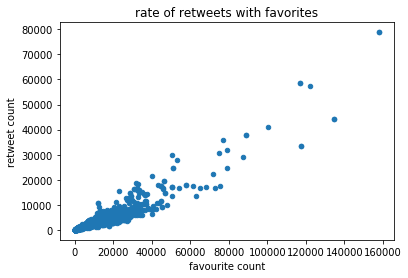

In [238]:
# Plot the data
df.plot(x='favorites',y='retweets',kind='scatter')
plt.xlabel('favourite count')
plt.ylabel('retweet count')
plt.title('rate of retweets with favorites');

As we can see that there is a positive correlation between retweets and favorites. More the number users liked the tweet or post more the number of retweets

## Insight 3:

In [240]:
# get the counts of ratings given
df.rating_numerator.value_counts()

12      525
10      477
11      469
13      303
14       50
27        2
420       1
24        1
26        1
44        1
45        1
50        1
1776      1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
60        1
Name: rating_numerator, dtype: int64

We can see that rating of 12/10 is more likely with 525 times given followed by rating 10/10 with 477 times. So most often given rating is 12/10.